## Observing Partial Autocorrelation Function

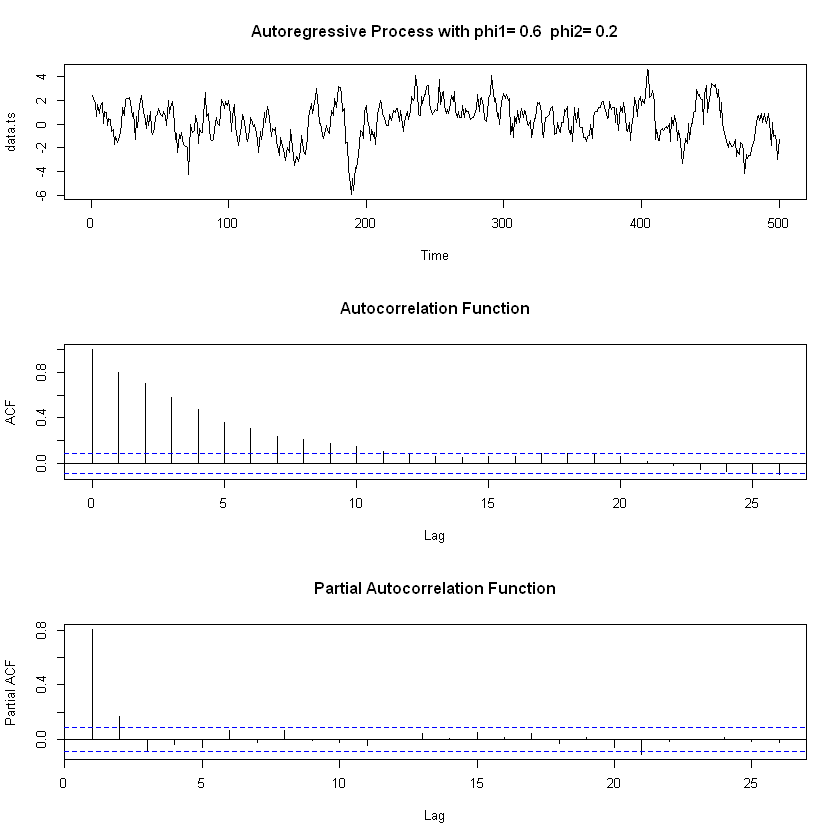

In [2]:
par(mfrow = c(3,1))
phi.1 = 0.6;phi.2 = 0.2; data.ts = arima.sim(n = 500, list(ar = c(phi.1,phi.2)))
plot(data.ts, main = paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2))
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type = "partial", main = "Partial Autocorrelation Function")

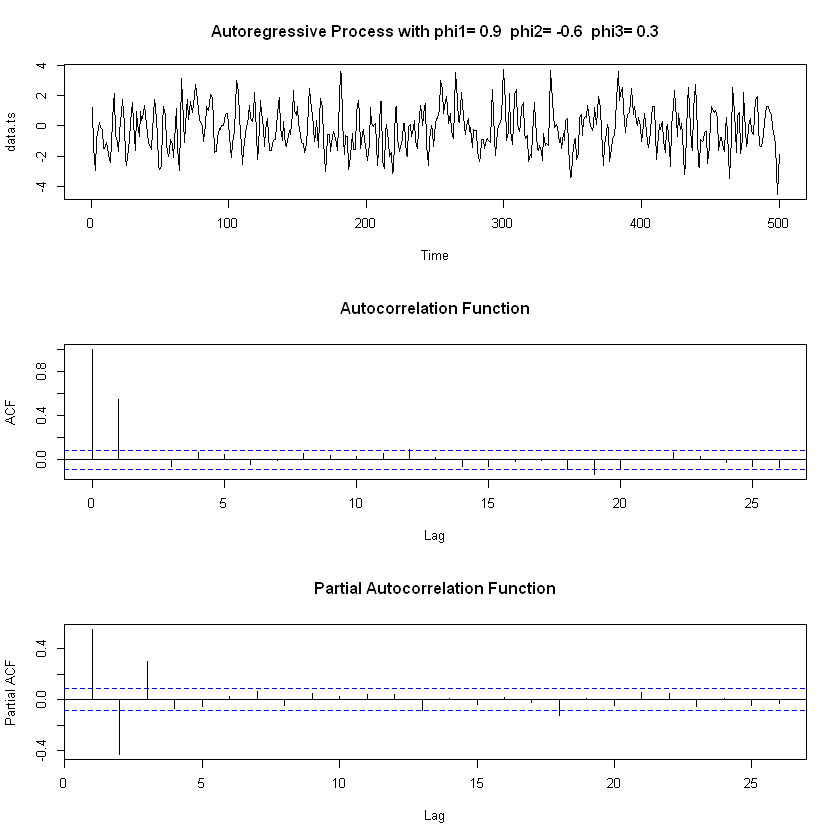

In [5]:
par(mfrow = c(3,1))
phi.1 = .9; phi.2 = -.6; phi.3 = .3; data.ts = arima.sim(n = 500, list(ar = c(phi.1,phi.2,phi.3)))
plot(data.ts, main = paste("Autoregressive Process with phi1=",phi.1," phi2=",phi.2," phi3=",phi.3))
acf(data.ts, main="Autocorrelation Function")
acf(data.ts, type = "partial", main = "Partial Autocorrelation Function")

## Partial Autocorrelation Function and the Beveridge Wheat PriceDataSet

In [66]:
install.packages("tseries")

also installing the dependency 'quadprog'



package 'quadprog' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashish\AppData\Local\Temp\RtmpakiNNw\downloaded_packages


In [67]:
library("tseries")

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [68]:
data(bev)

In [72]:
print(bev)
beveridge.ts= ts(bev)

Time Series:
Start = 1500 
End = 1869 
Frequency = 1 
  [1]  17.0  19.0  20.0  15.0  13.0  14.0  14.0  14.0  14.0  11.0  16.0  19.0
 [13]  23.0  18.0  17.0  20.0  20.0  18.0  14.0  16.0  21.0  24.0  15.0  16.0
 [25]  20.0  14.0  16.0  25.5  25.8  26.0  26.0  29.0  20.0  18.0  16.0  22.0
 [37]  22.0  16.0  19.0  17.0  17.0  19.0  20.0  24.0  28.0  36.0  20.0  14.0
 [49]  18.0  27.0  29.0  36.0  29.0  27.0  30.0  38.0  50.0  24.0  25.0  30.0
 [61]  31.0  37.0  41.0  36.0  32.0  47.0  42.0  37.0  34.0  36.0  43.0  55.0
 [73]  64.0  79.0  59.0  47.0  48.0  49.0  45.0  53.0  55.0  55.0  54.0  56.0
 [85]  52.0  76.0 113.0  68.0  59.0  74.0  78.0  69.0  78.0  73.0  88.0  98.0
 [97] 109.0 106.0  87.0  77.0  77.0  63.0  70.0  70.0  63.0  61.0  66.0  78.0
[109]  93.0  97.0  77.0  83.0  81.0  82.0  78.0  75.0  80.0  87.0  72.0  65.0
[121]  74.0  91.0 115.0  99.0  99.0 115.0 101.0  90.0  95.0 108.0 147.0 112.0
[133] 108.0  99.0  96.0 102.0 105.0 114.0 103.0  98.0 103.0 101.0 110.0 109.0
[145]  98.

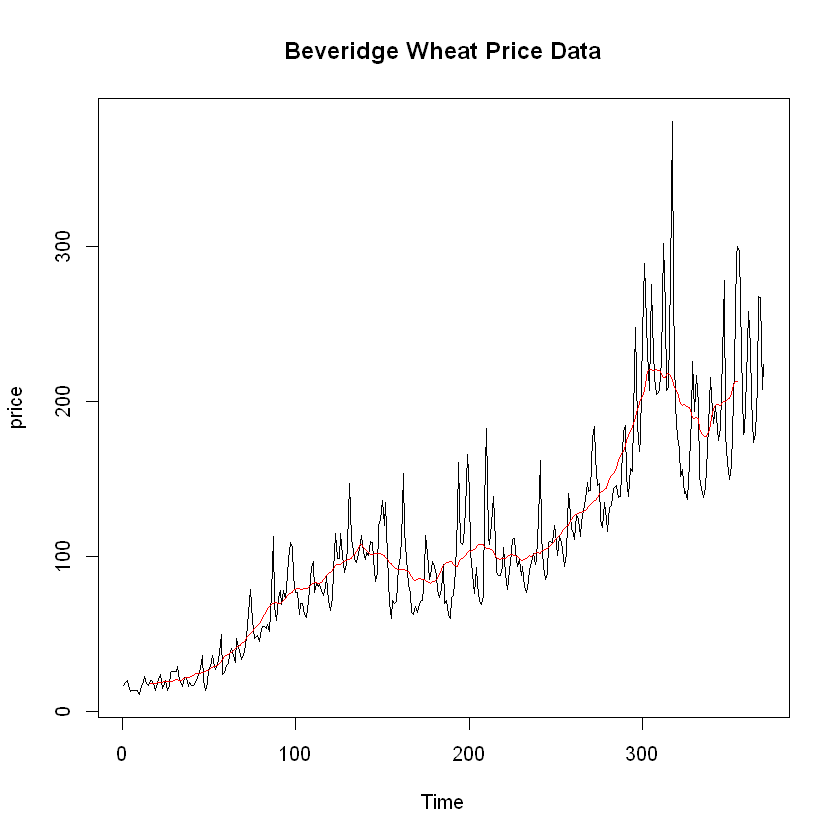

In [74]:
plot( beveridge.ts, ylab="price", main="Beveridge Wheat Price Data")
beveridge.MA = filter(beveridge.ts, rep(1/31, 31), sides = 2)
lines(beveridge.MA, col="red")

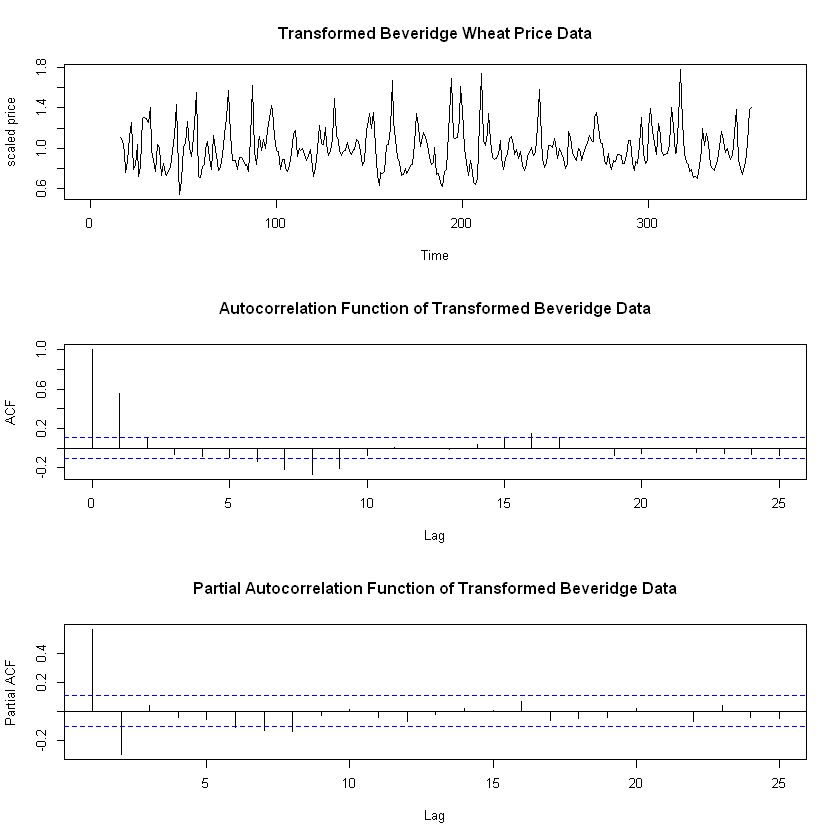

In [75]:
par(mfrow=c(3,1))
Y =  beveridge.ts/beveridge.MA
plot( Y, ylab="scaled price", main="Transformed Beveridge Wheat Price Data")
acf(na.omit(Y),main="Autocorrelation Function of Transformed Beveridge Data")
acf(na.omit(Y), type="partial", main="Partial Autocorrelation Function of Transformed Beveridge Data")

In [76]:
ar(na.omit(Y),order.max = 5)


Call:
ar(x = na.omit(Y), order.max = 5)

Coefficients:
      1        2  
 0.7239  -0.2957  

Order selected 2  sigma^2 estimated as  0.02692